# 6.7 - Creating Data Dashboards

### Importing Libraries and Data

### Dropping Outliers

### Correlations

### Standardization and Clustering

### Elbow Technique

### K-Means Clustering

### Importing Libraries and Data

In [1]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Import k-means library from scikit-learn
from sklearn.preprocessing import StandardScaler # Import StandardScaler for standardization
from sklearn.decomposition import PCA # Import PCA (Principal Components Analysis) for Standardization
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Importing Data
path = r'C:\Users\arafo\CareerFoundry\Hotel Booking Analysis'
df_bookings = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', 'bookings_checkedout_after_regression.csv'), index_col = False)

In [3]:
# Display all columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
%matplotlib inline

In [5]:
df_bookings.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [6]:
# Remove first column again
df_bookings = df_bookings.drop(['Unnamed: 0'], axis = 1)

In [7]:
df_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [8]:
df_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time
count,61797.0,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000,61797.000000
mean,0.0,69.718530,2016.180850,26.774277,15.779552,0.974319,2.530770,1.855284,0.122320,0.012509,0.049970,0.018868,0.234008,0.310128,0.603735,102.802332,0.116964,0.770652,1.990113,3.505089
std,0.0,80.918249,0.688917,13.902409,8.819782,1.004700,1.976154,0.508565,0.424895,0.123945,0.217885,0.299578,1.970948,0.754358,8.936308,51.320528,0.326029,0.851663,0.689060,2.652262
min,0.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.070000,0.000000,0.000000,2.000000,2.000000
50%,0.0,38.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000,2.000000,3.000000
75%,0.0,110.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,1.000000,2.000000,4.000000
max,0.0,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,18.000000,379.000000,510.000000,8.000000,5.000000,12.000000,56.000000


### Dropping Outliers

<AxesSubplot:>

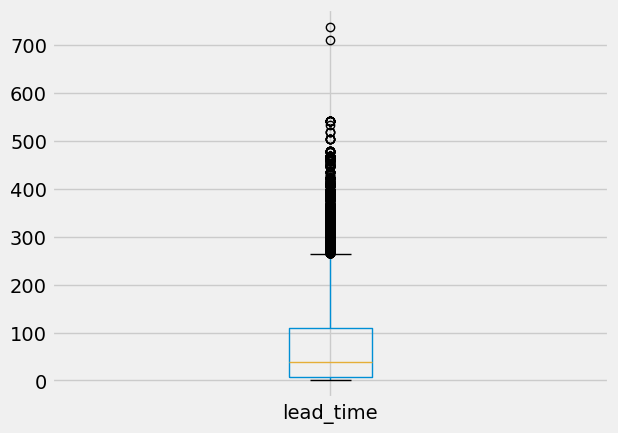

In [9]:
df_bookings.boxplot(column=['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

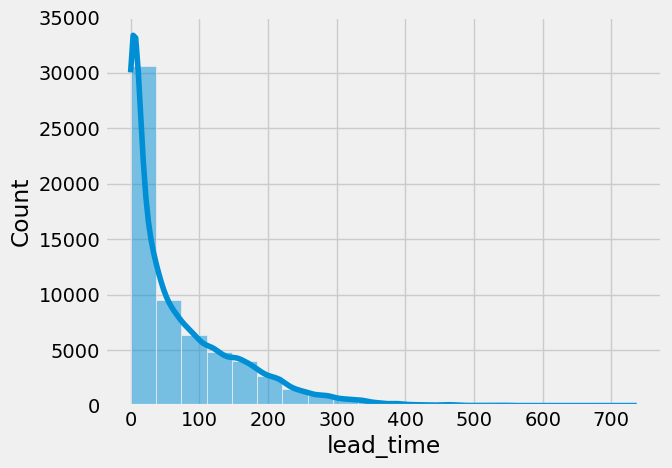

In [10]:
sns.histplot(df_bookings['lead_time'], bins = 20, kde = True)

In [11]:
# Removing outliers
df_test = df_bookings[df_bookings['lead_time'] <=300] 

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

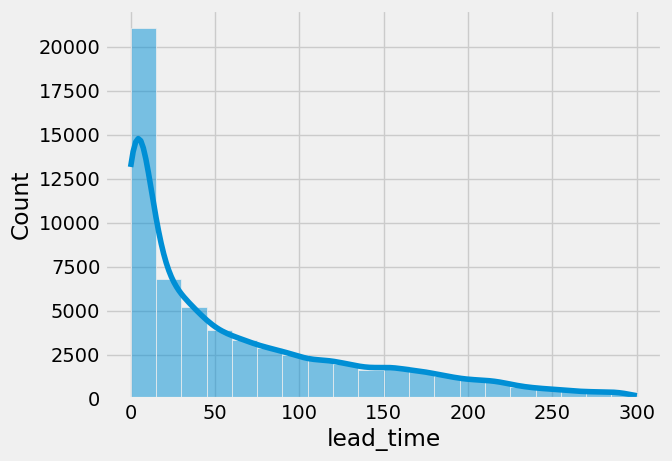

In [12]:
sns.histplot(df_test['lead_time'], bins = 20, kde = True)

<AxesSubplot:>

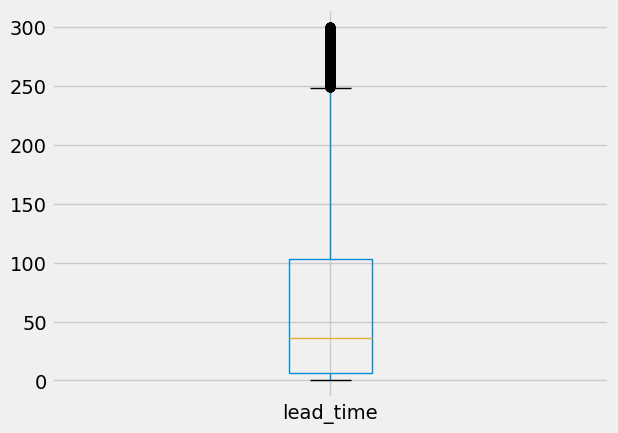

In [13]:
df_test.boxplot(column=['lead_time'])

In [14]:
df_test.loc[df_test['stays_in_week_nights'] == 40]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
20937,Resort Hotel,0,71,2017,January,2,10,16,40,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,28.79,0,0,Check-Out,2017-03-07,United Kingdom,Europe,No Wait,2,56


In [15]:
df_test.loc[df_test['stays_in_week_nights'] > 30]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
10231,City Hotel,0,206,2016,July,30,23,14,34,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,6,No Deposit,0,Transient-Party,0.00,0,1,Check-Out,2016-09-09,Portugal,Europe,No Wait,2,48
20668,Resort Hotel,0,1,2017,February,5,3,13,32,1,0,0,BB,GBR,Direct,Direct,1,0,1,2,No Deposit,0,Transient,42.11,0,3,Check-Out,2017-03-20,United Kingdom,Europe,No Wait,1,45
20937,Resort Hotel,0,71,2017,January,2,10,16,40,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,28.79,0,0,Check-Out,2017-03-07,United Kingdom,Europe,No Wait,2,56
27089,Resort Hotel,0,30,2015,September,37,7,13,33,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,17,No Deposit,0,Transient,0.00,0,1,Check-Out,2015-10-23,Spain,Europe,No Wait,2,46


<AxesSubplot:>

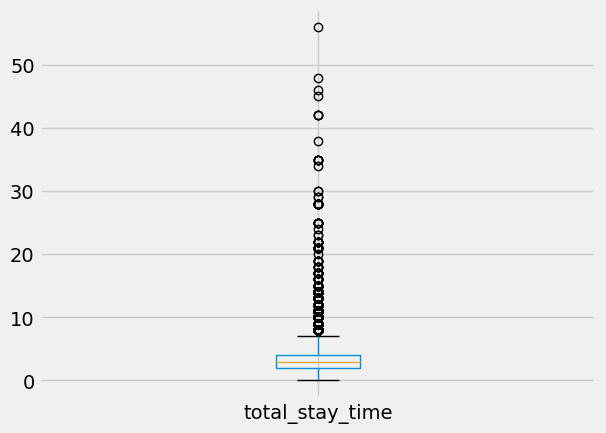

In [16]:
df_test.boxplot(column=['total_stay_time'])

<AxesSubplot:xlabel='total_stay_time', ylabel='Count'>

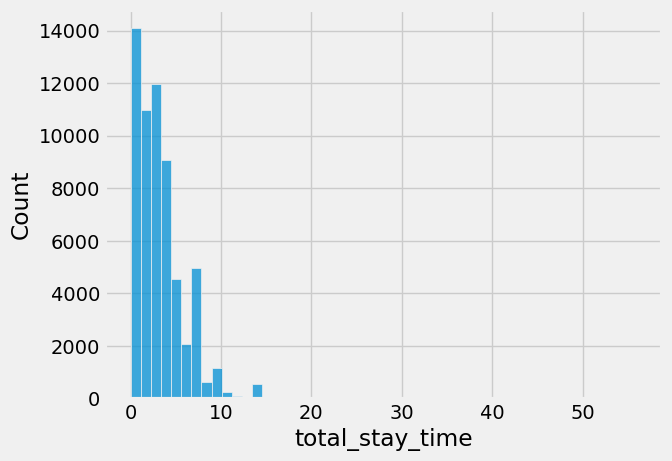

In [17]:
sns.histplot(df_test['total_stay_time'], bins = 50)

In [18]:
# Removing stay time outliers
df_test = df_test[df_test['total_stay_time'] <=20] 

<AxesSubplot:xlabel='total_stay_time', ylabel='Count'>

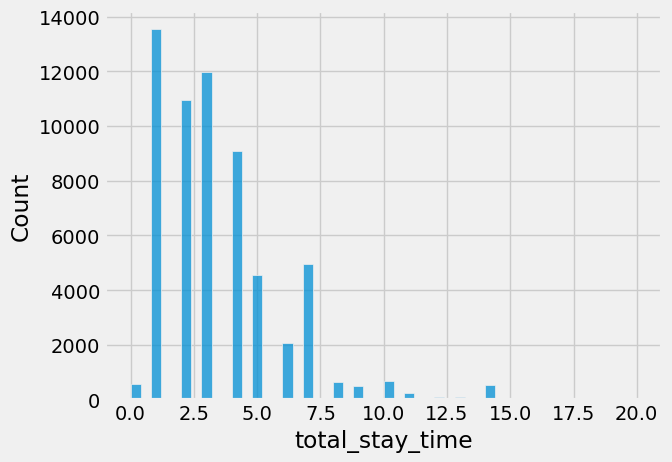

In [19]:
sns.histplot(df_test['total_stay_time'], bins = 50)

In [20]:
df_test.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time
count,60557.0,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000,60557.000000
mean,0.0,64.238734,2016.175372,26.706921,15.784434,0.954935,2.476378,1.855343,0.123289,0.012468,0.050779,0.019238,0.238024,0.301303,0.497036,103.128773,0.117691,0.770960,1.991099,3.431313
std,0.0,71.076833,0.689819,13.952243,8.824666,0.961578,1.835665,0.509679,0.426660,0.124032,0.219547,0.302591,1.990196,0.730567,7.758636,51.491565,0.326824,0.850558,0.691333,2.446891
min,0.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,6.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.470000,0.000000,0.000000,2.000000,2.000000
50%,0.0,36.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000,2.000000,3.000000
75%,0.0,103.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.130000,0.000000,1.000000,2.000000,4.000000
max,0.0,300.000000,2017.000000,53.000000,31.000000,6.000000,15.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,17.000000,259.000000,510.000000,8.000000,5.000000,12.000000,20.000000


<AxesSubplot:xlabel='babies', ylabel='Count'>

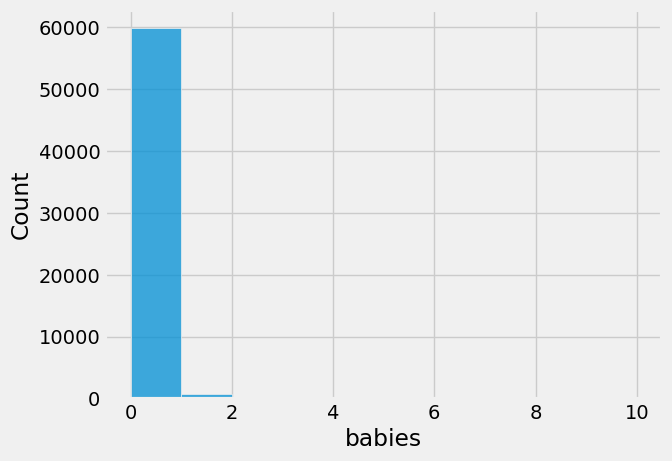

In [21]:
sns.histplot(df_test['babies'], bins = 10)

In [22]:
# Removing babies outliers
df_test = df_test[df_test['babies'] <=3] 

In [23]:
df_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4
5,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,94.71,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4
6,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Contract,97.50,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [24]:
df_test.value_counts('hotel')

hotel
City Hotel      36098
Resort Hotel    24457
dtype: int64

In [25]:
# Add new column for hotel
df_test['hotel_type'] = [0 if x == 'Resort Hotel' else 1 for x in df_test['hotel']]

In [26]:
df_test.value_counts('hotel_type')

hotel_type
1    36098
0    24457
dtype: int64

In [27]:
df_test.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time,hotel_type
count,60555.0,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000
mean,0.0,64.240063,2016.175394,26.707060,15.784576,0.954934,2.476410,1.855355,0.123293,0.012154,0.050780,0.019239,0.238032,0.301280,0.497052,103.129216,0.117695,0.770969,1.990802,3.431343,0.596119
std,0.0,71.077591,0.689813,13.952002,8.824777,0.961577,1.835684,0.509675,0.426666,0.111369,0.219551,0.302596,1.990229,0.730568,7.758763,51.492349,0.326829,0.850566,0.689379,2.446924,0.490678
min,0.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,6.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.470000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.0,36.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000,2.000000,3.000000,1.000000
75%,0.0,103.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.150000,0.000000,1.000000,2.000000,4.000000,1.000000
max,0.0,300.000000,2017.000000,53.000000,31.000000,6.000000,15.000000,4.000000,3.000000,2.000000,1.000000,13.000000,72.000000,17.000000,259.000000,510.000000,8.000000,5.000000,5.000000,20.000000,1.000000


### Correlations

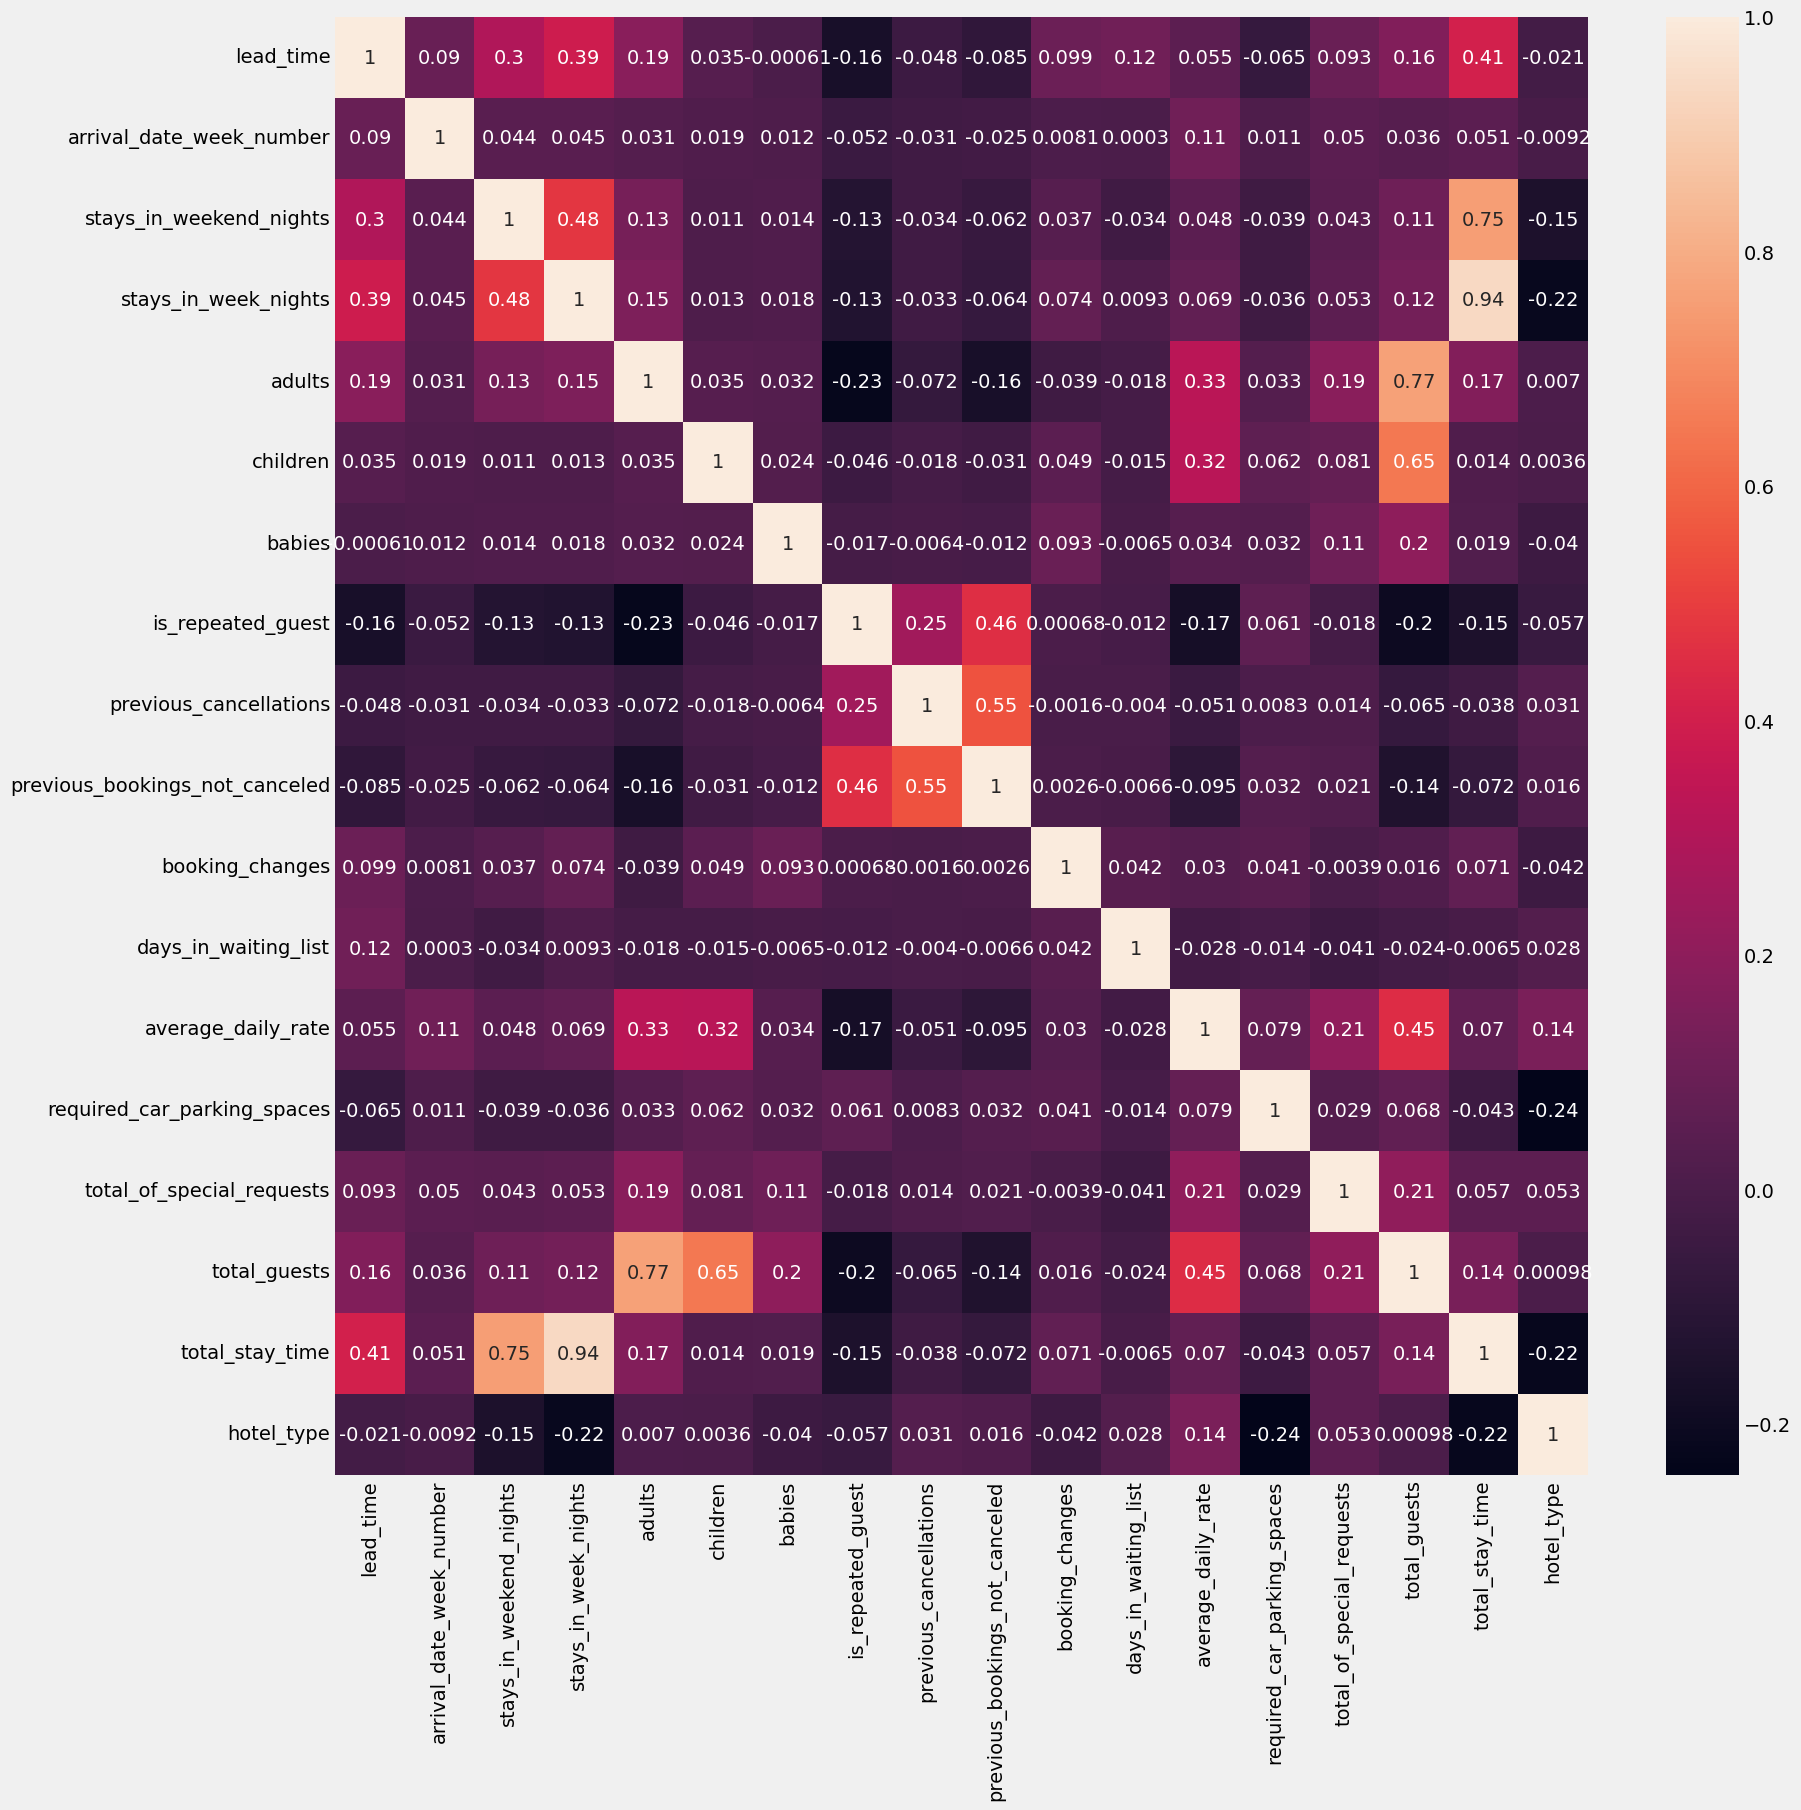

In [28]:
# Creating a subplot removing some date information
f, ax = plt.subplots(figsize=(18,18))
df_subset = df_test[['lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights',
                         'adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                         'booking_changes','days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests',
                         'total_guests','total_stay_time','hotel_type']]


# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

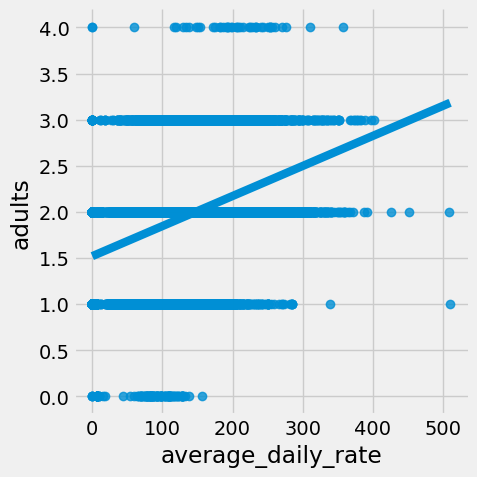

In [29]:
# Average Daily Rate and Adults have a 0.33 correlation
# Scatterplot for Average Daily Rate and Adults
sns.lmplot(x = 'average_daily_rate', y = 'adults', data = df_test)

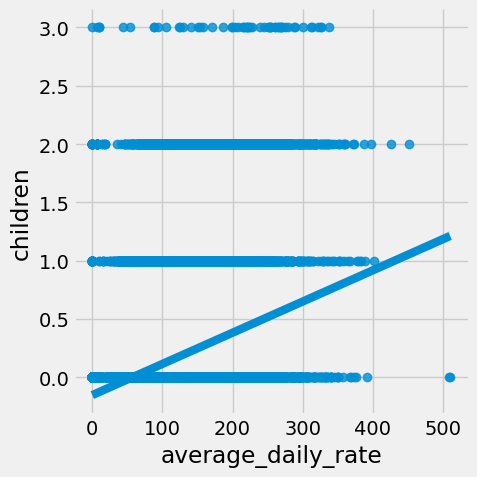

In [30]:
# Average Daily Rate and Children have a 0.32 correlation
# Scatterplot for Average Daily Rate and children
sns.lmplot(x = 'average_daily_rate', y = 'children', data = df_test)

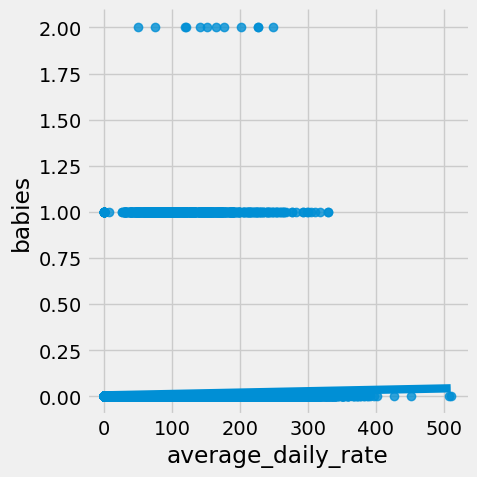

In [31]:
# Average Daily Rate and Babies have a 0.034 correlation
# Scatterplot for Average Daily Rate and babies
sns.lmplot(x = 'average_daily_rate', y = 'babies', data = df_test)

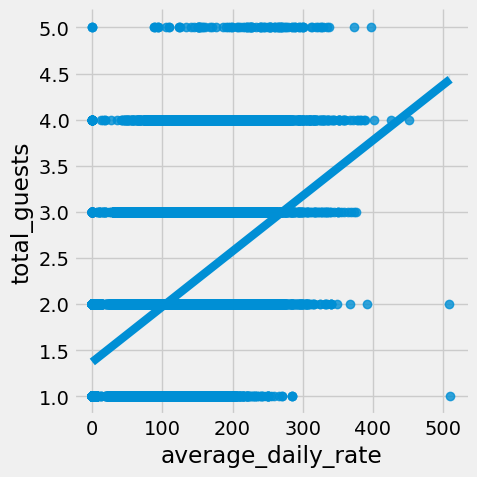

In [32]:
# Average Daily Rate and Total Guests have a 0.45 correlation
# Scatterplot for Average Daily Rate and total_guests
sns.lmplot(x = 'average_daily_rate', y = 'total_guests', data = df_test)

### Standardization and Clustering

In [33]:
df_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time,hotel_type
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
5,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,94.71,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
6,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Contract,97.50,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0


In [34]:
df_test2 = df_test.copy()

In [35]:
df_test2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time,hotel_type
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
5,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,94.71,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
6,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Contract,97.50,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0


In [36]:
# Dropping categorical columns
df_test2.drop(['hotel','meal','country','market_segment','distribution_channel',
                    'deposit_type','customer_type','reservation_status',
                   'country_name', 'region', 'waitlist_flag'], axis = 1, inplace = True)

In [37]:
df_test2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,total_stay_time,hotel_type
2,0,0,2015,July,27,1,0,2,2,0,0,0,0,0,0,0,107.00,0,0,2015-07-03,2,2,0
3,0,9,2015,July,27,1,0,2,2,0,0,0,0,0,0,0,103.00,0,1,2015-07-03,2,2,0
4,0,35,2015,July,27,1,0,4,2,0,0,0,0,0,0,0,145.00,0,0,2015-07-05,2,4,0
5,0,37,2015,July,27,1,0,4,2,0,0,0,0,0,0,0,94.71,0,0,2015-07-05,2,4,0
6,0,37,2015,July,27,1,0,4,2,0,0,0,0,0,0,0,97.50,0,0,2015-07-05,2,4,0


In [38]:
df_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time,hotel_type
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
5,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,94.71,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0
6,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Contract,97.50,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0


In [39]:
# Changing Arrival Date Month from Strings to Numbers
df_test2['arrival_date_month'] = df_test2['arrival_date_month'].replace(['January', 'February','March','April',
                                                                                'May','June','July','August','September',
                                                                                 'October','November','December'],
                                                                                ['1', '2','3','4',
                                                                                '5','6','7','8','9',
                                                                                '10','11','12'])

In [40]:
# Change arrival date month to int
df_test2['arrival_date_month'] = df_test2['arrival_date_month'].astype(int)

In [41]:
# Check for nulls
df_test2.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
total_guests                      0
total_stay_time                   0
hotel_type                        0
dtype: int64

In [42]:
df_test2.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
average_daily_rate                float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status_date            object
total_guests                        int64
total_stay_time                     int64
hotel_type                          int64
dtype: object

In [43]:
# Drop non-numeric columns
df_test2.drop(['reservation_status_date'], axis = 1, inplace = True)

In [44]:
# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_test2)

In [45]:
# Fit standardized data to PCA
pca = PCA()
pca.fit(df_standardized)

PCA()

In [46]:
# Show how much variance is explained by each component
pca.explained_variance_ratio_

array([1.54610758e-01, 1.12359294e-01, 1.08233638e-01, 8.21020257e-02,
       6.22649786e-02, 5.33033816e-02, 5.00742476e-02, 4.78260056e-02,
       4.74748234e-02, 4.50263058e-02, 4.07238740e-02, 3.63433919e-02,
       3.43211658e-02, 3.29059891e-02, 2.95667070e-02, 2.52347952e-02,
       1.88650497e-02, 1.87443817e-02, 1.91869352e-05, 7.17908721e-32,
       7.51418397e-33, 0.00000000e+00])

Text(0, 0.5, 'Cumulative Explained Variance')

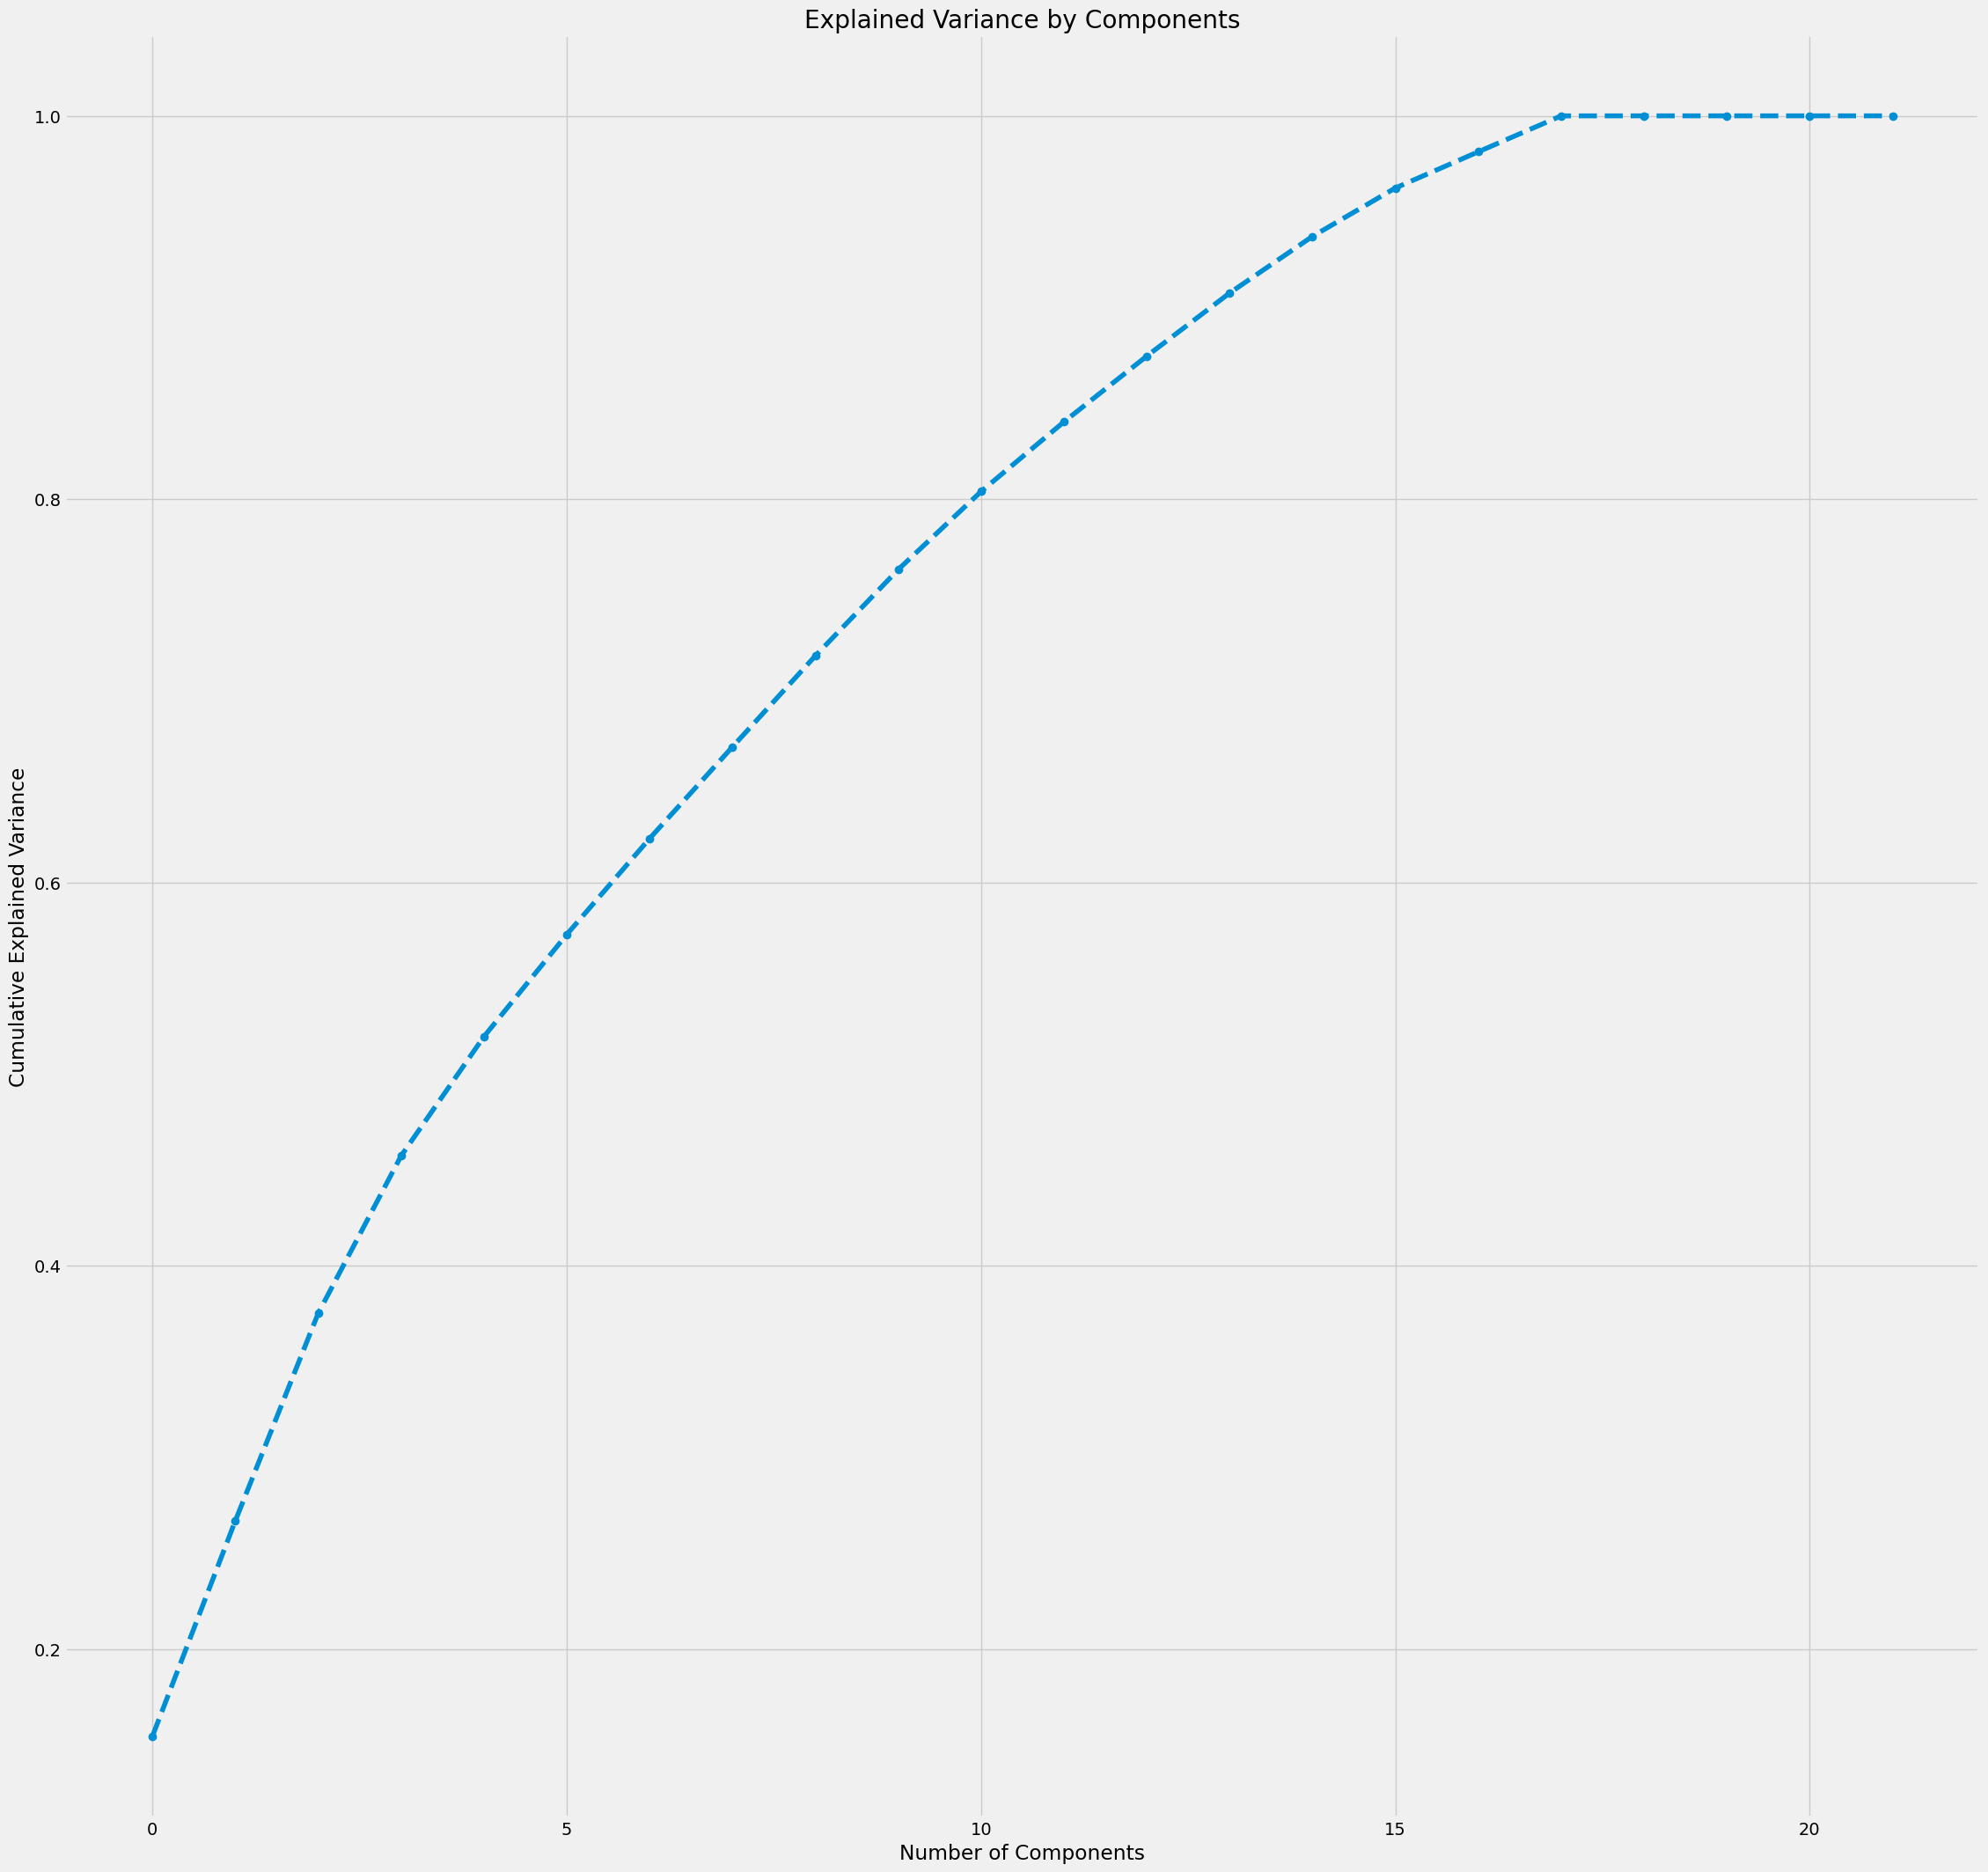

In [47]:
plt.figure(figsize = (25, 25))
plt.plot(range(0,22), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [48]:
# Rule of thumb is to keep at least 80% of variance, so we keep 10 components.
pca = PCA(n_components = 10)

In [49]:
# Fit model to selected number of components
pca.fit(df_standardized)

PCA(n_components=10)

In [50]:
# Taking only calculated resulting components
pca.transform(df_standardized)

array([[ 0.75763064, -1.03360398, -0.43043482, ...,  2.02429515,
         0.0845521 , -0.52857353],
       [ 0.58804984, -0.97282075, -0.56333754, ...,  1.7833842 ,
         0.35654957, -0.13698356],
       [-0.32359612, -0.88410221,  0.10170176, ...,  1.94035628,
        -0.00753471, -0.2514447 ],
       ...,
       [-1.76712448,  0.51286512,  1.00923239, ..., -1.47848414,
        -0.04189327, -0.05524386],
       [ 0.07109353,  0.22081353, -1.23343967, ...,  0.31625298,
        -0.10287464,  0.96414971],
       [ 0.46664046,  0.17808612, -1.56743464, ...,  0.21479546,
        -0.02659738,  0.92094128]])

In [51]:
scores_pca = pca.transform(df_standardized)

### Elbow Technique

In [52]:
# Defining range of number of clusters
num_cl = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defining k-means clusters in range

In [53]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]
score

[-970623.0533663777,
 -852202.3613543356,
 -761139.4946812224,
 -688748.1199659415,
 -626944.0879030555,
 -575055.1882292235,
 -534103.8058834646,
 -493373.82262229524,
 -461142.48903524067,
 -435639.80434237584,
 -416215.69177436037,
 -400813.8971534843,
 -387734.4776171268,
 -377167.3715447567,
 -367610.0676204606,
 -355550.435464881,
 -345442.8337260574,
 -337180.4498722569,
 -328002.6915075143]

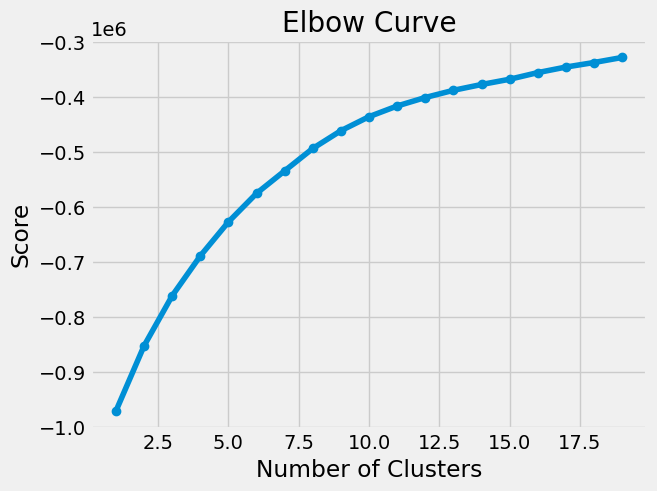

In [54]:
# Plot the Elbow curve

pl.plot(num_cl, score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### K-Means Clustering

In [55]:
# Create the k-means object
kmeans = KMeans(n_clusters = 6)

In [56]:
# Fit the data to the kmeans object
kmeans.fit(scores_pca)

KMeans(n_clusters=6)

In [80]:
df_test2['clusters'] = kmeans.fit_predict(df_test2)
df_test['clusters'] = kmeans.fit_predict(df_test2)

In [58]:
df_test2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time,hotel_type,clusters
2,0,0,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,107.00,0,0,2,2,0,3
3,0,9,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,103.00,0,1,2,2,0,3
4,0,35,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,145.00,0,0,2,4,0,3
5,0,37,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,94.71,0,0,2,4,0,3
6,0,37,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,97.50,0,0,2,4,0,3


In [59]:
df_test2['clusters'].value_counts()

0    17086
3    15980
4    10879
5     6251
2     5542
1     4817
Name: clusters, dtype: int64

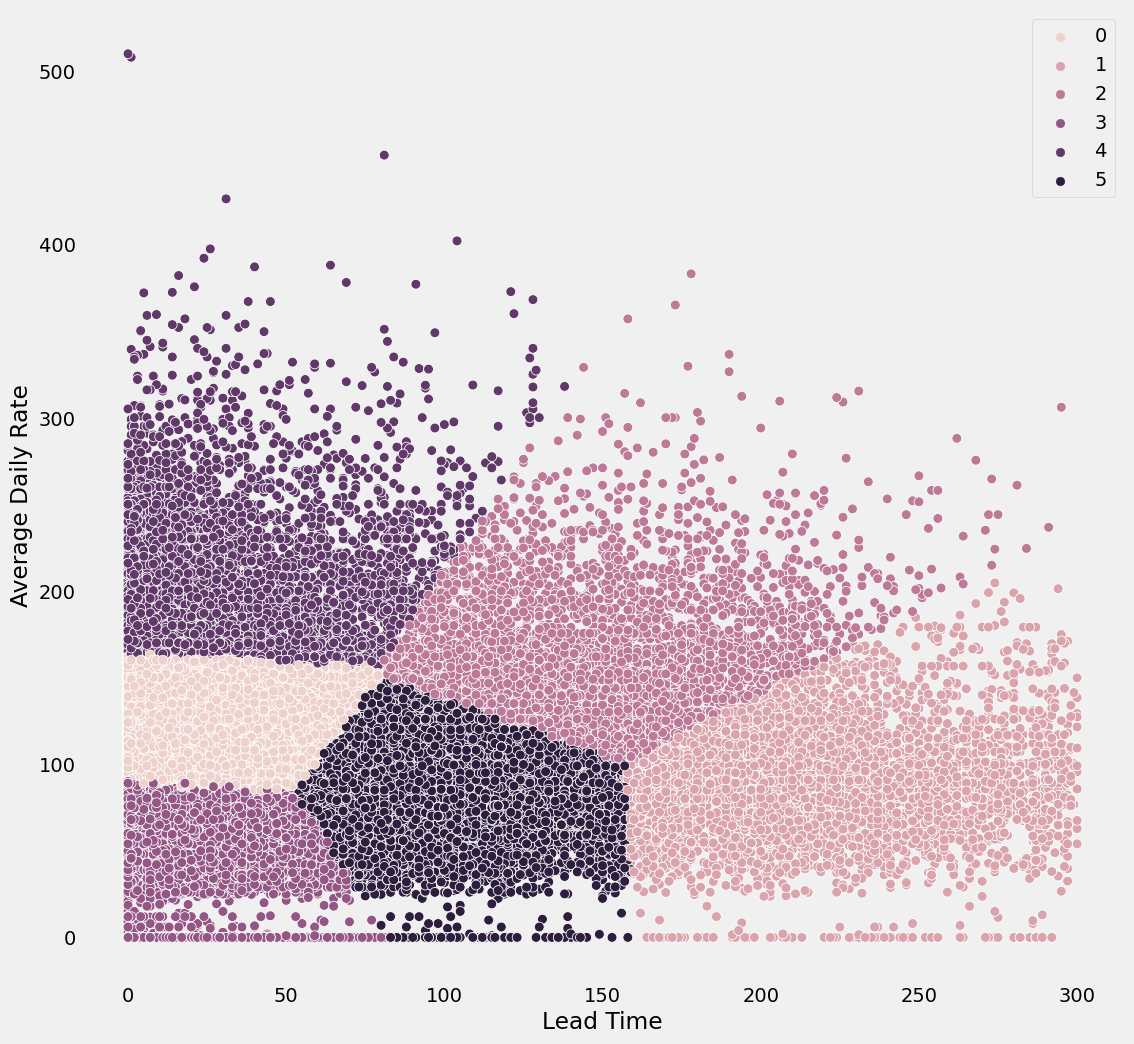

In [60]:
# Plot clusters for the "Lead Time" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_test2['lead_time'], y=df_test2['average_daily_rate'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lead Time') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

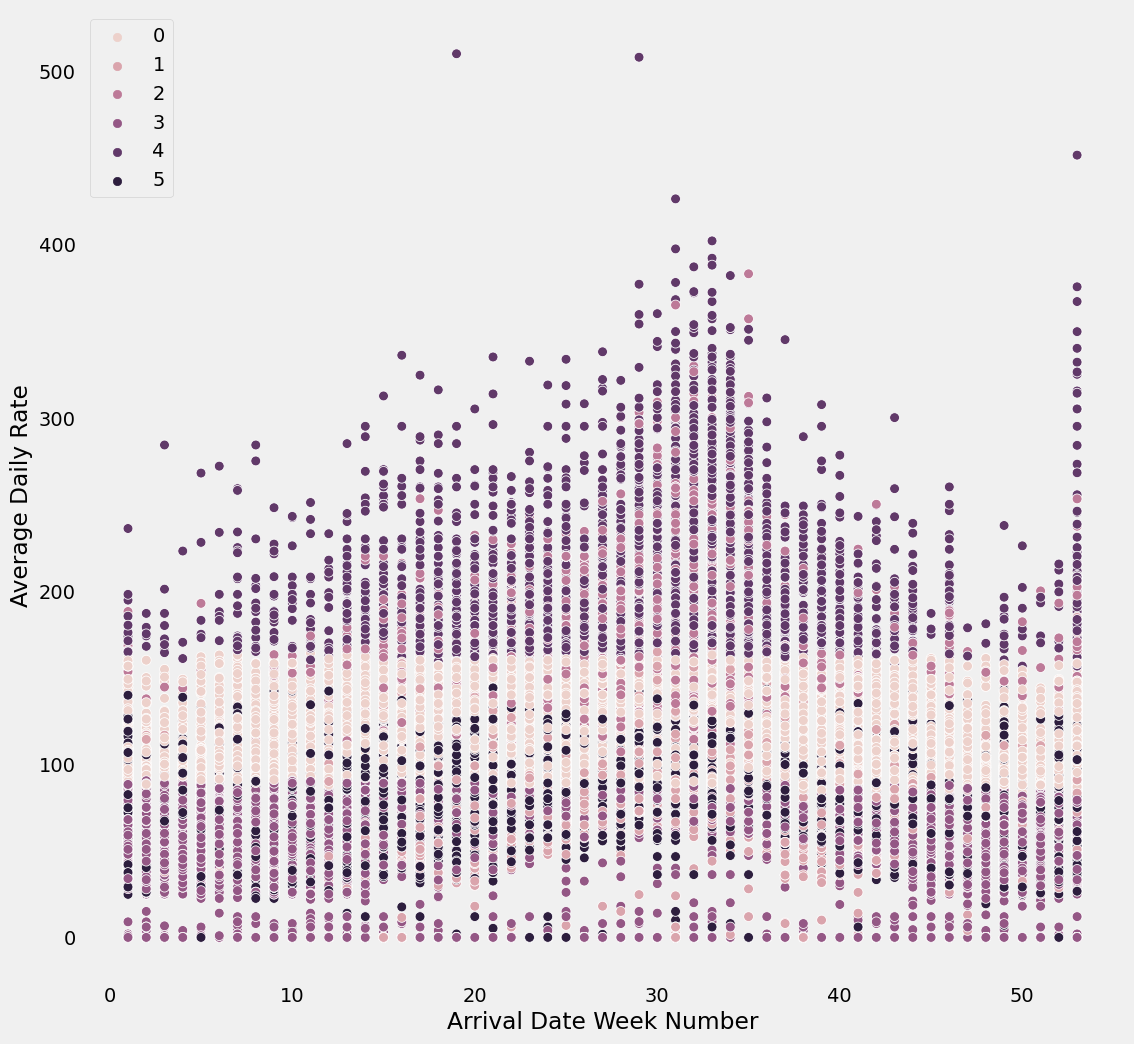

In [61]:
# Plot clusters for the "Arrival Date Week Number" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_test2['arrival_date_week_number'], y=df_test2['average_daily_rate'], hue=kmeans.labels_, s=50) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Arrival Date Week Number') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

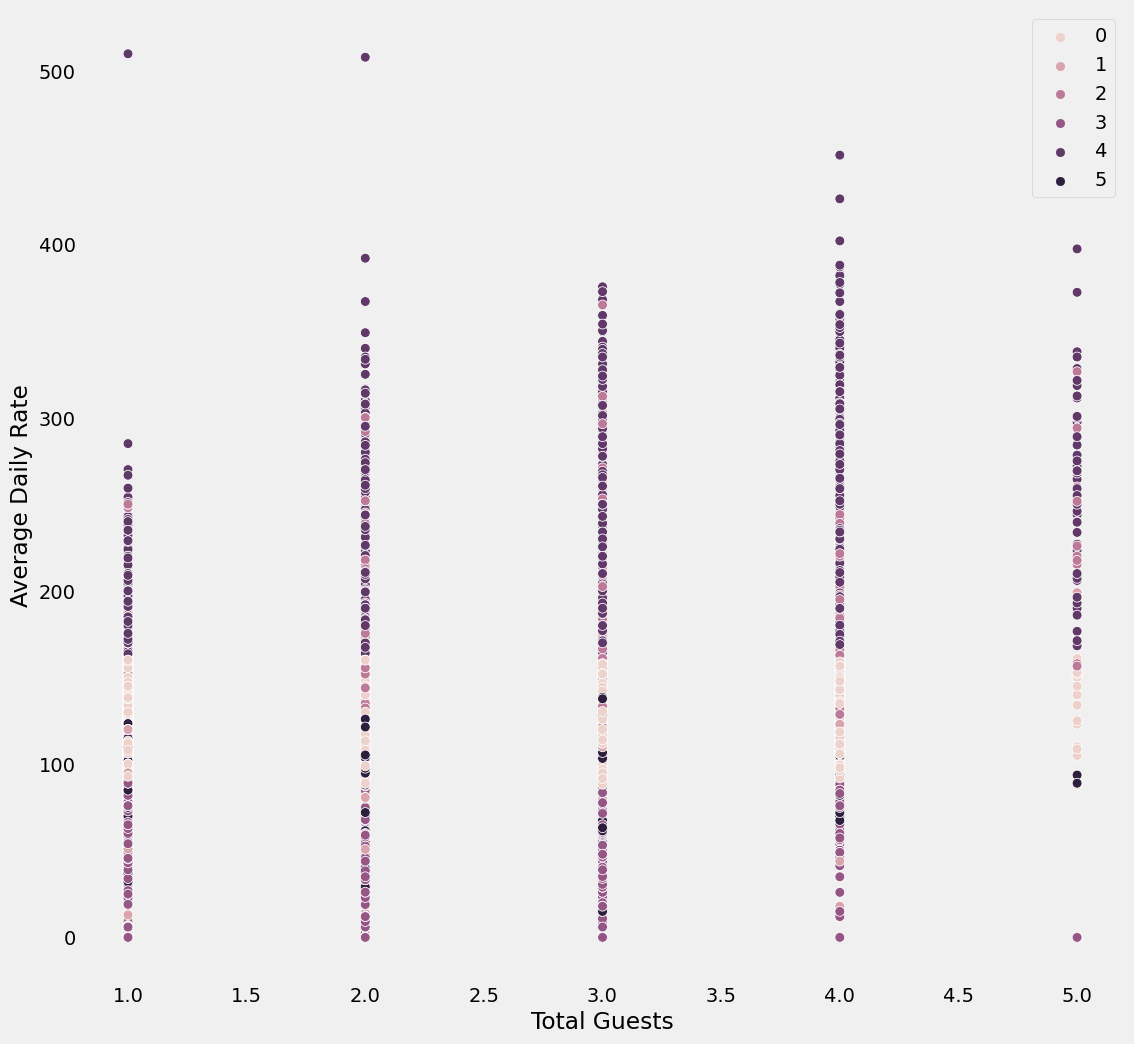

In [62]:
# Plot clusters for the "Total Guests" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_test2['total_guests'], y=df_test2['average_daily_rate'], hue=kmeans.labels_, s=50) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Guests') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

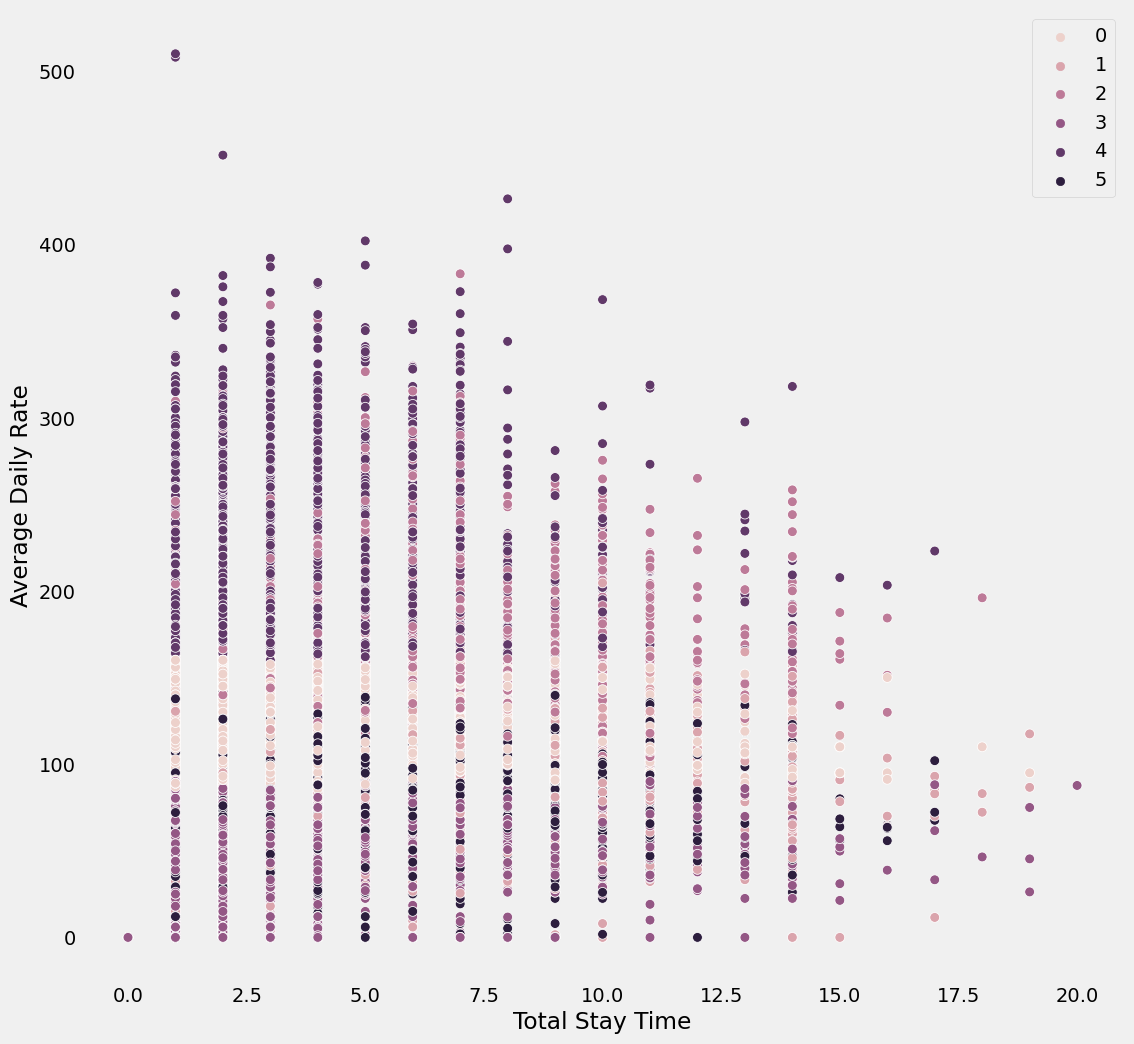

In [63]:
# Plot clusters for the "Total Stay Time" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_test2['total_stay_time'], y=df_test2['average_daily_rate'], hue=kmeans.labels_, s=50) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Stay Time') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

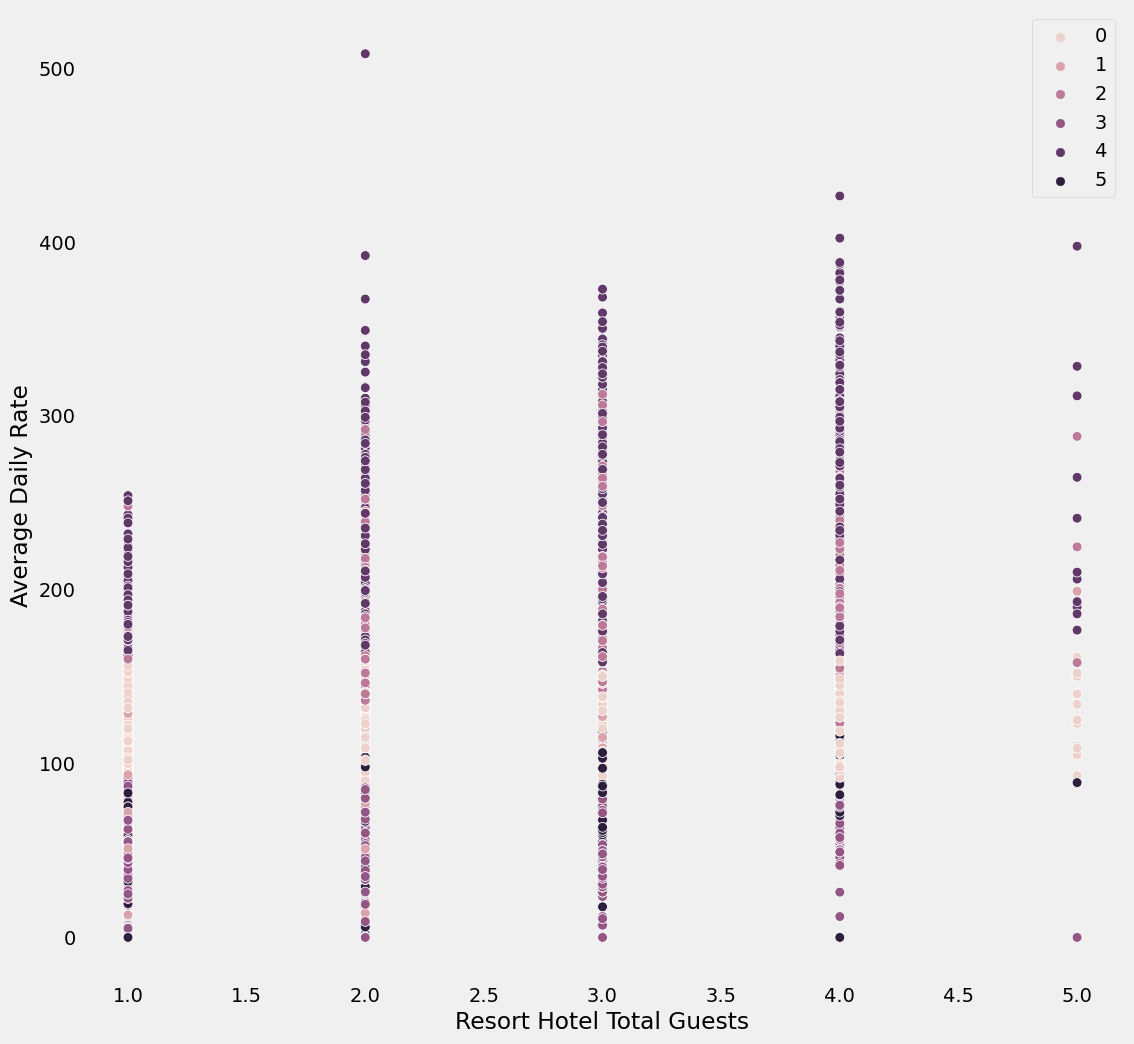

In [64]:
# Plot clusters for the "Total Guests" and "Average Daily Rate" variables, based on hotel type 0, the Resort Hotel

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=(df_test2['total_guests'].where(df_test2['hotel_type'] == 0 )), y=(df_test2['average_daily_rate'].where(df_test2['hotel_type'] == 0 )), hue=kmeans.labels_, s=50) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Resort Hotel Total Guests') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

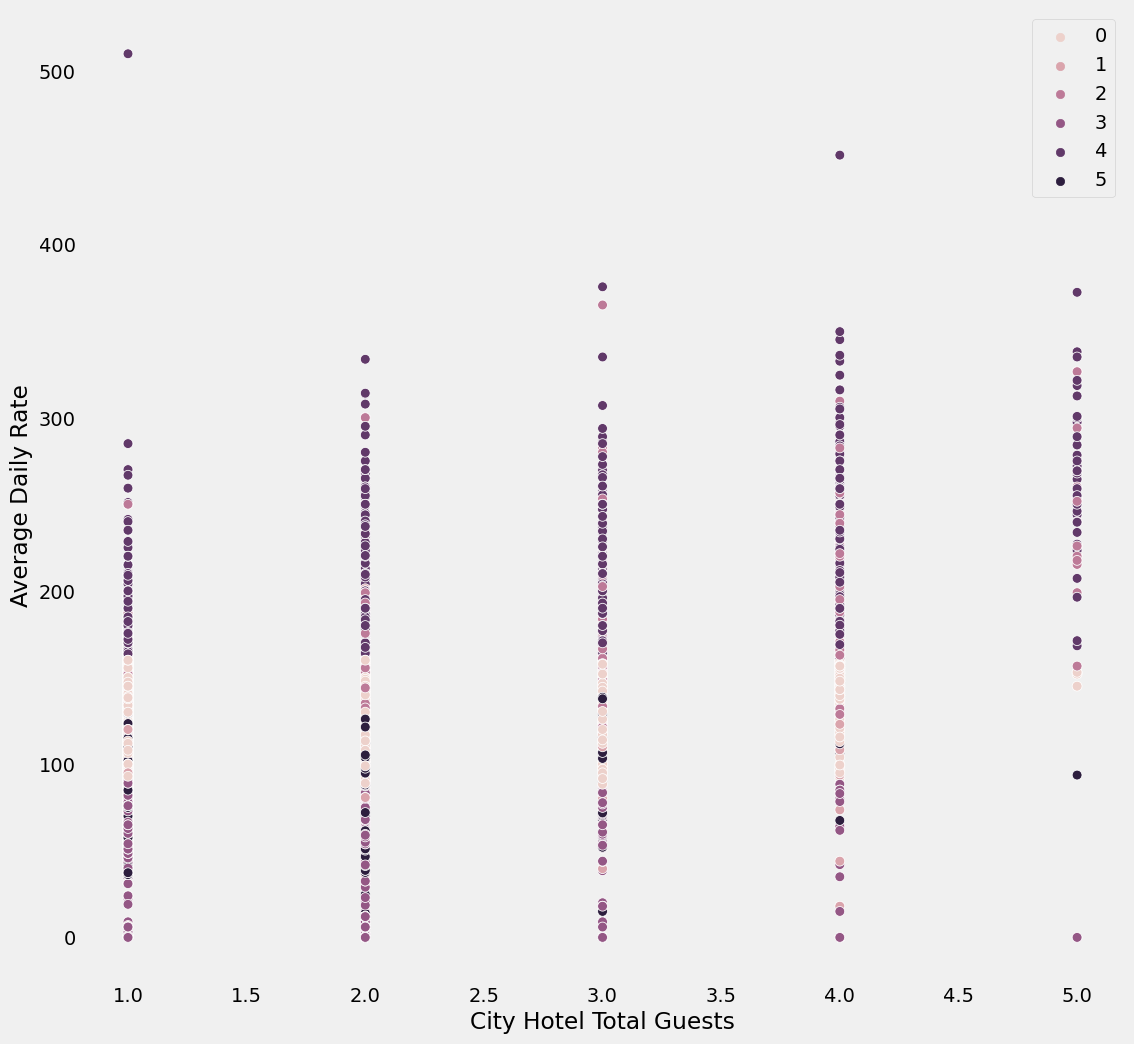

In [65]:
# Plot clusters for the "Total Guests" and "Average Daily Rate" variables, based on hotel type 1, the City Hotel

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=(df_test2['total_guests'].where(df_test2['hotel_type'] == 1 )), y=(df_test2['average_daily_rate'].where(df_test2['hotel_type'] == 1 )), hue=kmeans.labels_, s=50) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('City Hotel Total Guests') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

In [83]:
df_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time,hotel_type,clusters
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0,1
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2,0,1
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0,1
5,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,94.71,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0,1
6,Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Contract,97.50,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4,0,1


In [84]:
df_test2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time,hotel_type,clusters
2,0,0,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,107.00,0,0,2,2,0,0
3,0,9,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,103.00,0,1,2,2,0,0
4,0,35,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,145.00,0,0,2,4,0,0
5,0,37,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,94.71,0,0,2,4,0,0
6,0,37,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,97.50,0,0,2,4,0,0


In [89]:
# Exporting
df_test.to_csv(os.path.join(path, '02 - Data','Prepared Data', 'bookings_outliers_cleaned_with_clusters.csv'))